In [1]:
# main function
import numpy as np
import torch
import matplotlib.pyplot as plt

from xopt.bayesian_exploration import bayesian_exploration

# test function
from xopt.evaluators import test_TNK


In [2]:
# Get VOCS
VOCS = test_TNK.VOCS
VOCS['objectives'] = {'y1' : None}

# add reference point
ref = torch.tensor((1.4, 1.4))

print(VOCS)
# Get evaluate function
EVALUATE = test_TNK.evaluate_TNK

# Run
init_x = torch.tensor([[0.9, 0.9], [0.6, 0.6]])
results = bayesian_exploration(VOCS, EVALUATE,
                                 n_initial_samples=5, initial_x=None,
                                 use_gpu=False,
                                 n_steps=5, verbose=True)

{'name': 'TNK_test', 'description': 'Constrainted test function TNK. See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf', 'simulation': 'test_TNK', 'variables': {'x1': [0, 3.14159], 'x2': [0, 3.14159]}, 'objectives': {'y1': None}, 'constraints': {'c1': ['GREATER_THAN', 0], 'c2': ['LESS_THAN', 0.5]}, 'constants': {'a': 'dummy_constant'}, 'linked_variables': {'x9': 'x1'}}
No executor given. Running in serial mode.
tensor([[0.4044, 0.0000]], dtype=torch.float64)
tensor([[3.1416, 3.1416]], dtype=torch.float64)
tensor([[0.9494, 0.9045]], dtype=torch.float64)
tensor([[0.6432, 1.0237]], dtype=torch.float64)
tensor([[1.1308, 0.2960]], dtype=torch.float64)


['inputs', 'objectives', 'constraints', 'constraint_status', 'feasibility', 'model']


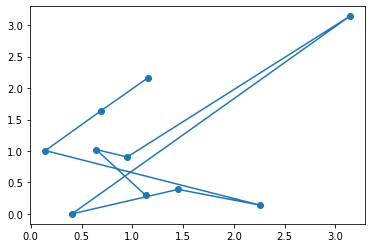

In [3]:
fig, ax = plt.subplots()
print(list(results.keys()))
ax.plot(results['inputs'][:, 0], results['inputs'][:, 1], '-o')

plt.show()